In [79]:
import yfinance as yf
import numpy as np
import pandas as pd

In [80]:
def download_stock_data(stock_name, start_date=None, end_date=None):
    data = yf.download(tickers=stock_name, start=start_date, end=end_date)

    return data

In [ ]:
# df = yf.download(tickers="AAPL", start="2020-01-01", end="2025-04-24")
# print(df.shape)
# print(df.head(5))

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [81]:
apple_data = download_stock_data("AAPL")

[*********************100%***********************]  1 of 1 completed


In [82]:
print(apple_data.shape)

(11183, 5)


In [83]:
print(apple_data.columns)

MultiIndex([( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [84]:
print(apple_data.tail(5))

Price            Close        High         Low        Open    Volume
Ticker            AAPL        AAPL        AAPL        AAPL      AAPL
Date                                                                
2025-04-21  193.160004  193.800003  189.809998  193.270004  46742500
2025-04-22  199.740005  201.589996  195.970001  196.119995  52976400
2025-04-23  204.600006  208.000000  202.800003  206.000000  52929200
2025-04-24  208.369995  208.830002  202.940002  204.889999  47311000
2025-04-25  209.279999  209.750000  206.199997  206.369995  38198600


In [85]:
apple_data = apple_data.reset_index()

In [86]:
print(apple_data.head(5))

Price        Date     Close      High       Low      Open     Volume
Ticker                 AAPL      AAPL      AAPL      AAPL       AAPL
0      1980-12-12  0.098726  0.099155  0.098726  0.098726  469033600
1      1980-12-15  0.093575  0.094005  0.093575  0.094005  175884800
2      1980-12-16  0.086707  0.087136  0.086707  0.087136  105728000
3      1980-12-17  0.088853  0.089282  0.088853  0.088853   86441600
4      1980-12-18  0.091429  0.091858  0.091429  0.091429   73449600


In [87]:
print(apple_data.columns)

MultiIndex([(  'Date',     ''),
            ( 'Close', 'AAPL'),
            (  'High', 'AAPL'),
            (   'Low', 'AAPL'),
            (  'Open', 'AAPL'),
            ('Volume', 'AAPL')],
           names=['Price', 'Ticker'])


In [88]:
print(apple_data["Close"]["AAPL"].head(5))

0    0.098726
1    0.093575
2    0.086707
3    0.088853
4    0.091429
Name: AAPL, dtype: float64


In [7]:
apple_data.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [8]:
from scipy import stats

In [9]:
# Z-Score（>3σ）处理异常数据，不建议
zscore_matrix = stats.zscore(apple_data)
print(zscore_matrix.shape)
print(zscore_matrix)

outliers = np.abs(zscore_matrix) > 3
print(outliers.shape)
print(outliers)

(11183, 5)
[[-0.47411794 -0.47422624 -0.47408509 -0.47423125  0.46453477]
 [-0.47421657 -0.4743239  -0.47418484 -0.47432176 -0.41214762]
 [-0.4743481  -0.47445414 -0.47431785 -0.47445343 -0.62195653]
 ...
 [ 3.44210898  3.46798643  3.45139308  3.47313502 -0.7798551 ]
 [ 3.51430478  3.48372491  3.45410429  3.45185502 -0.79665673]
 [ 3.53173147  3.5011699   3.51723678  3.48022826 -0.82390801]]
(11183, 5)
[[False False False False False]
 [False False False False False]
 [False False False False False]
 ...
 [ True  True  True  True False]
 [ True  True  True  True False]
 [ True  True  True  True False]]


In [10]:
# 检测是否有成交量为负数
(apple_data["Volume"] < 0).sum()

Ticker
AAPL    0
dtype: int64

/var/folders/5y/j_m_t57j1l53bytznvm_hmsr0000gn/T/ipykernel_9412/3819393006.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


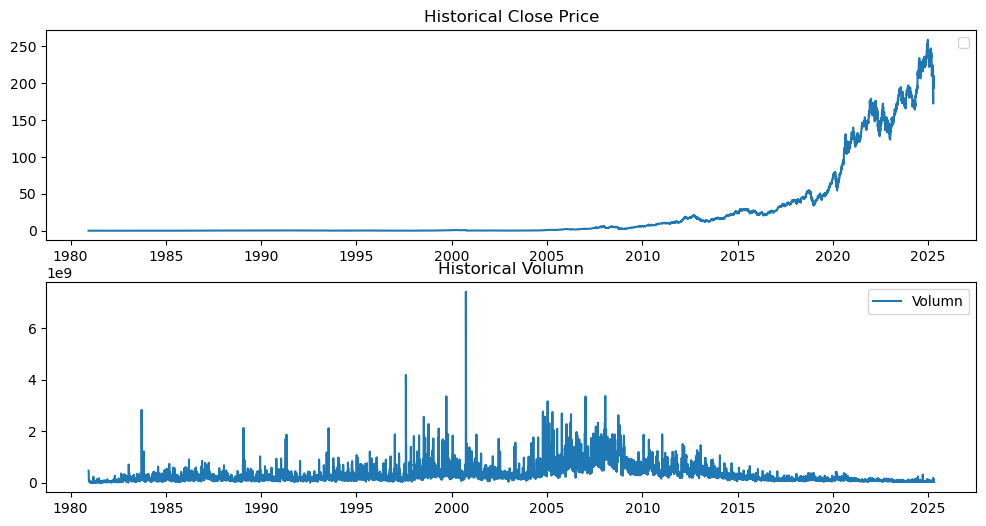

In [11]:
# 验证清洗效果
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.title('Historical Close Price')
plt.legend()
plt.plot(apple_data["Close"], label="Close Price")
plt.subplot(2, 1, 2)
plt.title('Historical Volumn')
plt.plot(apple_data["Volume"], label="Volumn")
plt.legend()
plt.show()

In [13]:
from prophet import Prophet

In [89]:
apple_data_ds = apple_data.reset_index()[["Date"]].rename(columns={"Date": "ds"})
apple_data_ds["y"] = apple_data["Close"]["AAPL"]
# apple_data_ds["y"] = pd.to_numeric(apple_data_ds["y"], errors="coerce")
 

In [67]:
print(apple_data_ds.shape)

(11183, 2)


In [107]:
print(apple_data_ds.tail(5))

Price          ds           y
Ticker                       
11178  2025-04-21  193.160004
11179  2025-04-22  199.740005
11180  2025-04-23  204.600006
11181  2025-04-24  208.369995
11182  2025-04-25  209.279999


In [91]:
print(apple_data_ds.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11183 entries, 0 to 11182
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   (ds, )  11183 non-null  datetime64[ns]
 1   (y, )   11183 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 174.9 KB
None


In [92]:
apple_data_new = apple_data_ds.reset_index()

In [93]:
print(apple_data_new.head(5))

Price  index         ds         y
Ticker                           
0          0 1980-12-12  0.098726
1          1 1980-12-15  0.093575
2          2 1980-12-16  0.086707
3          3 1980-12-17  0.088853
4          4 1980-12-18  0.091429


In [94]:
model = Prophet()

In [95]:
model.fit(apple_data_ds)

18:57:01 - cmdstanpy - INFO - Chain [1] start processing
18:57:05 - cmdstanpy - INFO - Chain [1] done processing


In [100]:
# 预测股价
future_price = model.make_future_dataframe(periods=10)


In [101]:
print(future_price.tail(5))

              ds
11188 2025-05-01
11189 2025-05-02
11190 2025-05-03
11191 2025-05-04
11192 2025-05-05


In [106]:
forecast = model.predict(future_price)
print(forecast.shape)
print(forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail(15))

(11193, 19)
              ds        yhat  yhat_lower  yhat_upper
11178 2025-04-21  217.420503  206.808980  227.739871
11179 2025-04-22  217.527390  206.709900  227.637283
11180 2025-04-23  217.615842  207.568175  228.431728
11181 2025-04-24  217.685192  206.904667  228.272058
11182 2025-04-25  217.758160  207.442098  229.437516
11183 2025-04-26  217.896601  207.266123  228.409472
11184 2025-04-27  217.998090  207.293567  228.152191
11185 2025-04-28  218.112789  208.197154  227.846425
11186 2025-04-29  218.226313  208.304544  228.896669
11187 2025-04-30  218.316860  208.324217  229.208561
11188 2025-05-01  218.383783  207.659637  228.491081
11189 2025-05-02  218.449947  207.775555  229.472428
11190 2025-05-03  218.577459  208.559995  229.355866
11191 2025-05-04  218.664256  208.023063  229.133062
11192 2025-05-05  218.760952  207.843696  228.562444


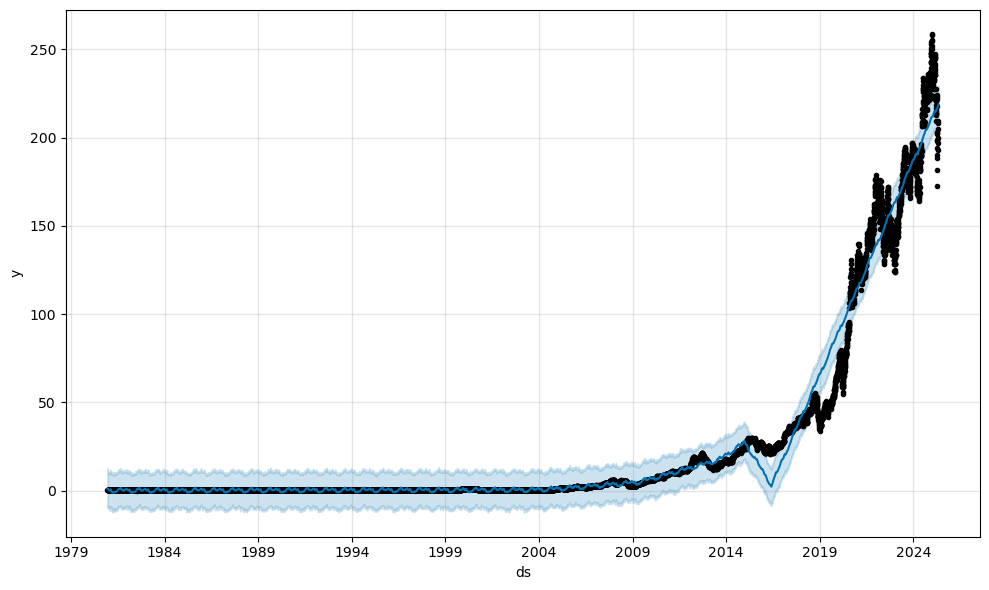

In [108]:
fig1 = model.plot(forecast)

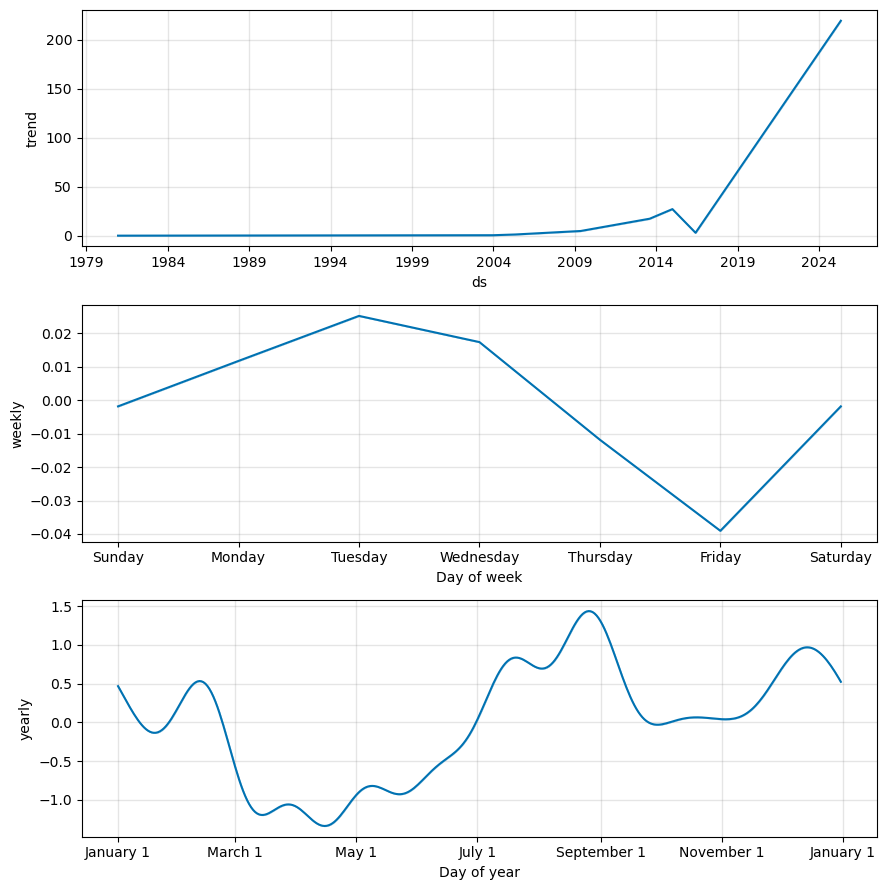

In [109]:
fig2 = model.plot_components(forecast)

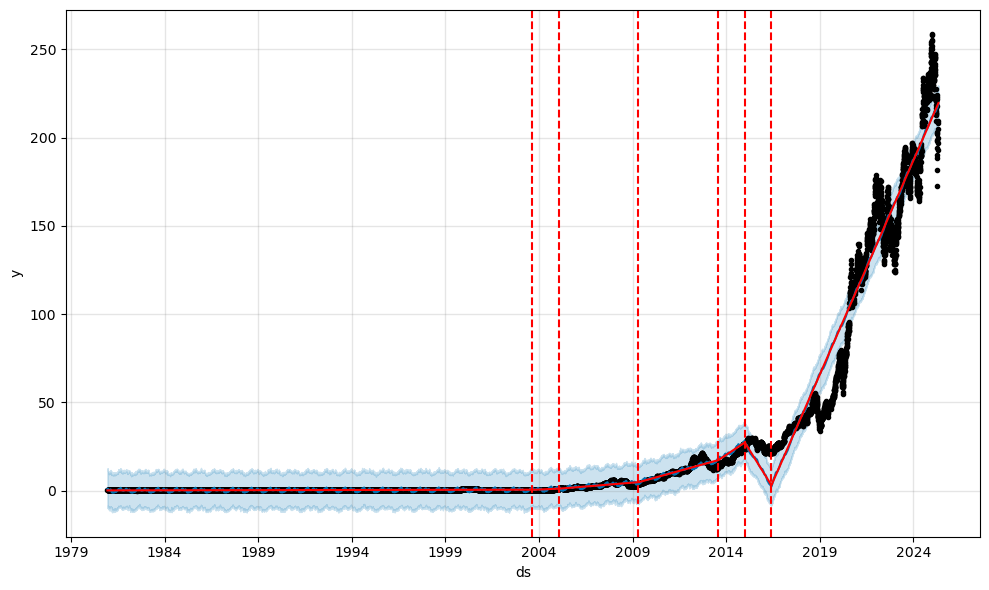

In [110]:
from prophet.plot import add_changepoints_to_plot
fig3 = model.plot(forecast)
a = add_changepoints_to_plot(fig3.gca(), model, forecast)